# Laboratorium 8 - PCA, Klasteryzacja

Celem laboratorium jest wykorzystanie gotowych implementacji analizy składowych głównych (PCA) oraz algorytmów związanych z klasteryzacją (k-średnich oraz klasteryzacji spektralnej). Zakładam, że algorytm PCA oraz pojęcie klasteryzacji są znane z wykładu. Jeżeli nie - braki w wiedzy należy uzupełnić.

Tradycyjnie, zacznijmy od importu bibliotek.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sklearn.decomposition as dc
import sklearn.datasets.samples_generator as sg
import sklearn.datasets as ds
import sklearn.cluster as cl

%matplotlib inline

np.random.seed(12345)

Zacznijmy od wygenerowania zbioru do PCA:

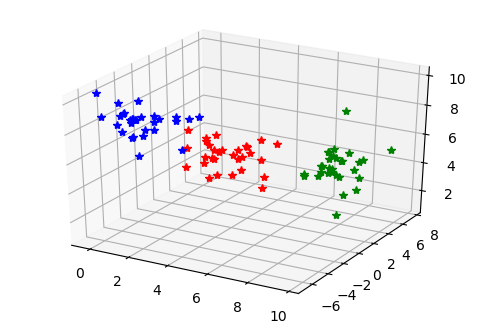

In [11]:
no_points_per_set = 30

x1 = np.random.randn(no_points_per_set, 3) + np.array([5, -3, 7])
x2 = np.random.randn(no_points_per_set, 3) + np.array([2, -5, 9])
x3 = np.random.randn(no_points_per_set, 3) + np.array([7, 5, 4])

X = np.concatenate((x1, x2, x3))
y = np.zeros(X.shape[0])
y[30:60] = 1
y[60:] = 2


fig = plt.figure(dpi=100)
ax = fig.add_subplot(111, projection='3d')
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], X[:, 2][y == 0], "r*")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], X[:, 2][y == 1], "b*")
plt.plot(X[:, 0][y == 2], X[:, 1][y == 2], X[:, 2][y == 2], "g*")
plt.show()

Dokonaj redukcji wymiarowości do dwóch, a następnie jednego wymiaru (korzystając z PCA). Wypisz sumę względnej wariancji po redukcji wymiarowości. Co ona oznacza?

Do czego może być stosowane PCA? Jakie są wady i zalety redukcji wymiarowości?

Przykładowy rezultat:

Total remaining variance 2-D: 0.954387292457554


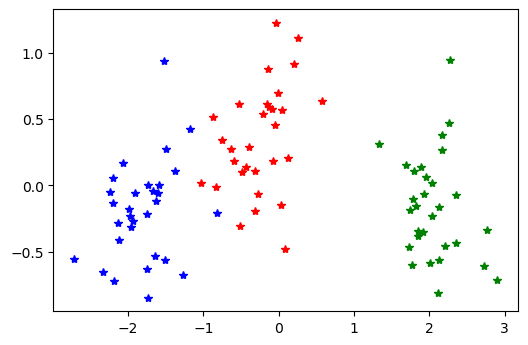

Total remaining variance 1-D: 0.8836371785654604


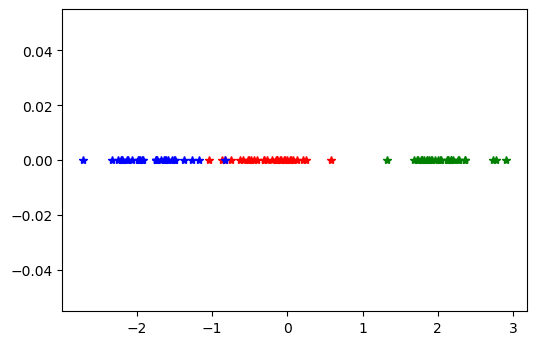

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() 
X = sc.fit_transform(X) 


pca2 = PCA(n_components=2)
pca2.fit(X)
X_pca = pca2.transform(X)
y = np.zeros(X_pca.shape[0])
y[30:60] = 1
y[60:] = 2

print("Total remaining variance 2-D:" ,pca2.explained_variance_ratio_[0] + pca2.explained_variance_ratio_[1])

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111,)
plt.plot(X_pca[:, 0][y == 0], X_pca[:, 1][y == 0], "r*")
plt.plot(X_pca[:, 0][y == 1], X_pca[:, 1][y == 1], "b*")
plt.plot(X_pca[:, 0][y == 2], X_pca[:, 1][y == 2], "g*")
plt.show()



pca1 = PCA(n_components=1)
pca1.fit(X)
X_pca = pca1.transform(X)

print("Total remaining variance 1-D:" ,pca1.explained_variance_ratio_[0])

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111,)
plt.plot(X_pca[:][y == 0], np.zeros_like(X_pca)[y == 0], "r*")
plt.plot(X_pca[:][y == 1], np.zeros_like(X_pca)[y == 1], "b*")
plt.plot(X_pca[:][y == 2], np.zeros_like(X_pca)[y == 2], "g*")
plt.show()



Następnie przejdźmy do klasteryzacji. Wygenerujmy dwa zbiory pokazujące możliwości różnych algorytmów służących do klasteryzacji.

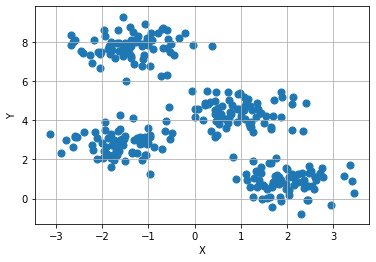

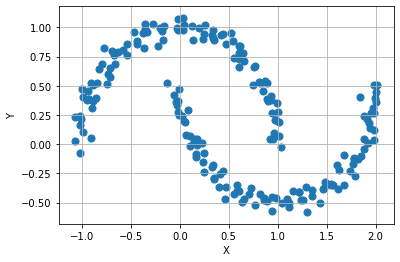

In [9]:
# Zbiory do klasteryzacji
X1, y1_true = sg.make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X2, y2_true = ds.make_moons(200, noise=.05, random_state=0)

plt.figure()
plt.scatter(X1[:, 0], X1[:, 1], s=50)
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)

plt.figure()
plt.scatter(X2[:, 0], X2[:, 1], s=50)
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

Intuicyjnie jesteśmy w stanie określić przynależność danego punktu do danego zbioru. Natomiast, jak liczbowo ocenić jakość klasteryzacji? Czym różni się klasteryzacja od klasyfikacji?

Dokonaj klasteryzacji obu zbiorów korzystając z algorytmów k-średnich oraz klasteryzacji spektralnej z biblioteki sklearn. Skąd biorą się różnice? Wytłumacz działanie obu algorytmów.
Praktyczne informacje dotyczące różnych algorytmów klasteryzacji można znaleźć na: https://scikit-learn.org/stable/modules/clustering.html
Bazując na podanym źródle, wytłumacz główne zalety algorytmu DBSCAN.

Przykładowy rezultat:

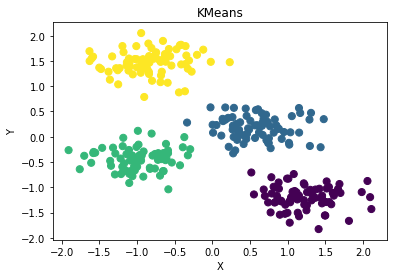

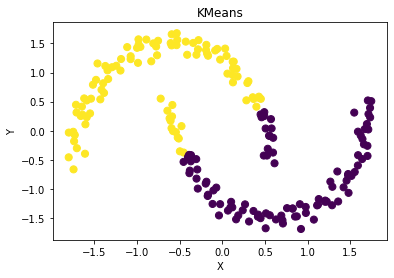

C:\Users\PoiPon\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


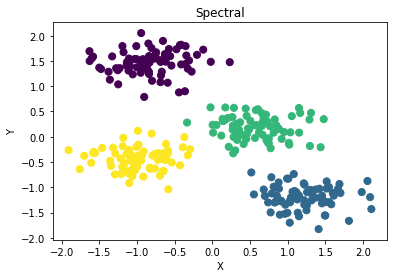

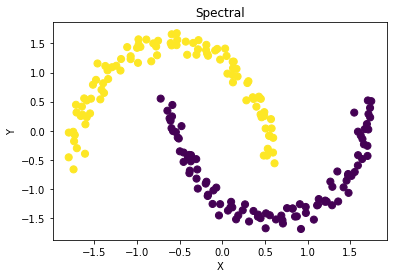

In [10]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

X1 = StandardScaler().fit_transform(X1)
X2 = StandardScaler().fit_transform(X2)


y1_pred1 = KMeans(n_clusters=4, random_state=0).fit_predict(X1)

plt.figure()
plt.scatter(X1[:, 0], X1[:, 1], s=50, c=y1_pred1)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("KMeans")


y2_pred1 = KMeans(n_clusters=2, random_state=0).fit_predict(X2)

plt.figure()
plt.scatter(X2[:, 0], X2[:, 1], s=50, c=y2_pred1)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("KMeans")

plt.show()



y1_pred2 = SpectralClustering(n_clusters=4, affinity='nearest_neighbors').fit_predict(X1)

plt.figure()
plt.scatter(X1[:, 0], X1[:, 1], s=50, c=y1_pred2)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Spectral")

y2_pred2 = SpectralClustering(n_clusters=2, affinity='nearest_neighbors').fit_predict(X2)

plt.figure()
plt.scatter(X2[:, 0], X2[:, 1], s=50, c=y2_pred2)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Spectral")

plt.show()
